In [26]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, pi, cos, sqrt
from scipy.integrate import odeint

### 1. Driven, Damped, Nonlinear Pendulum

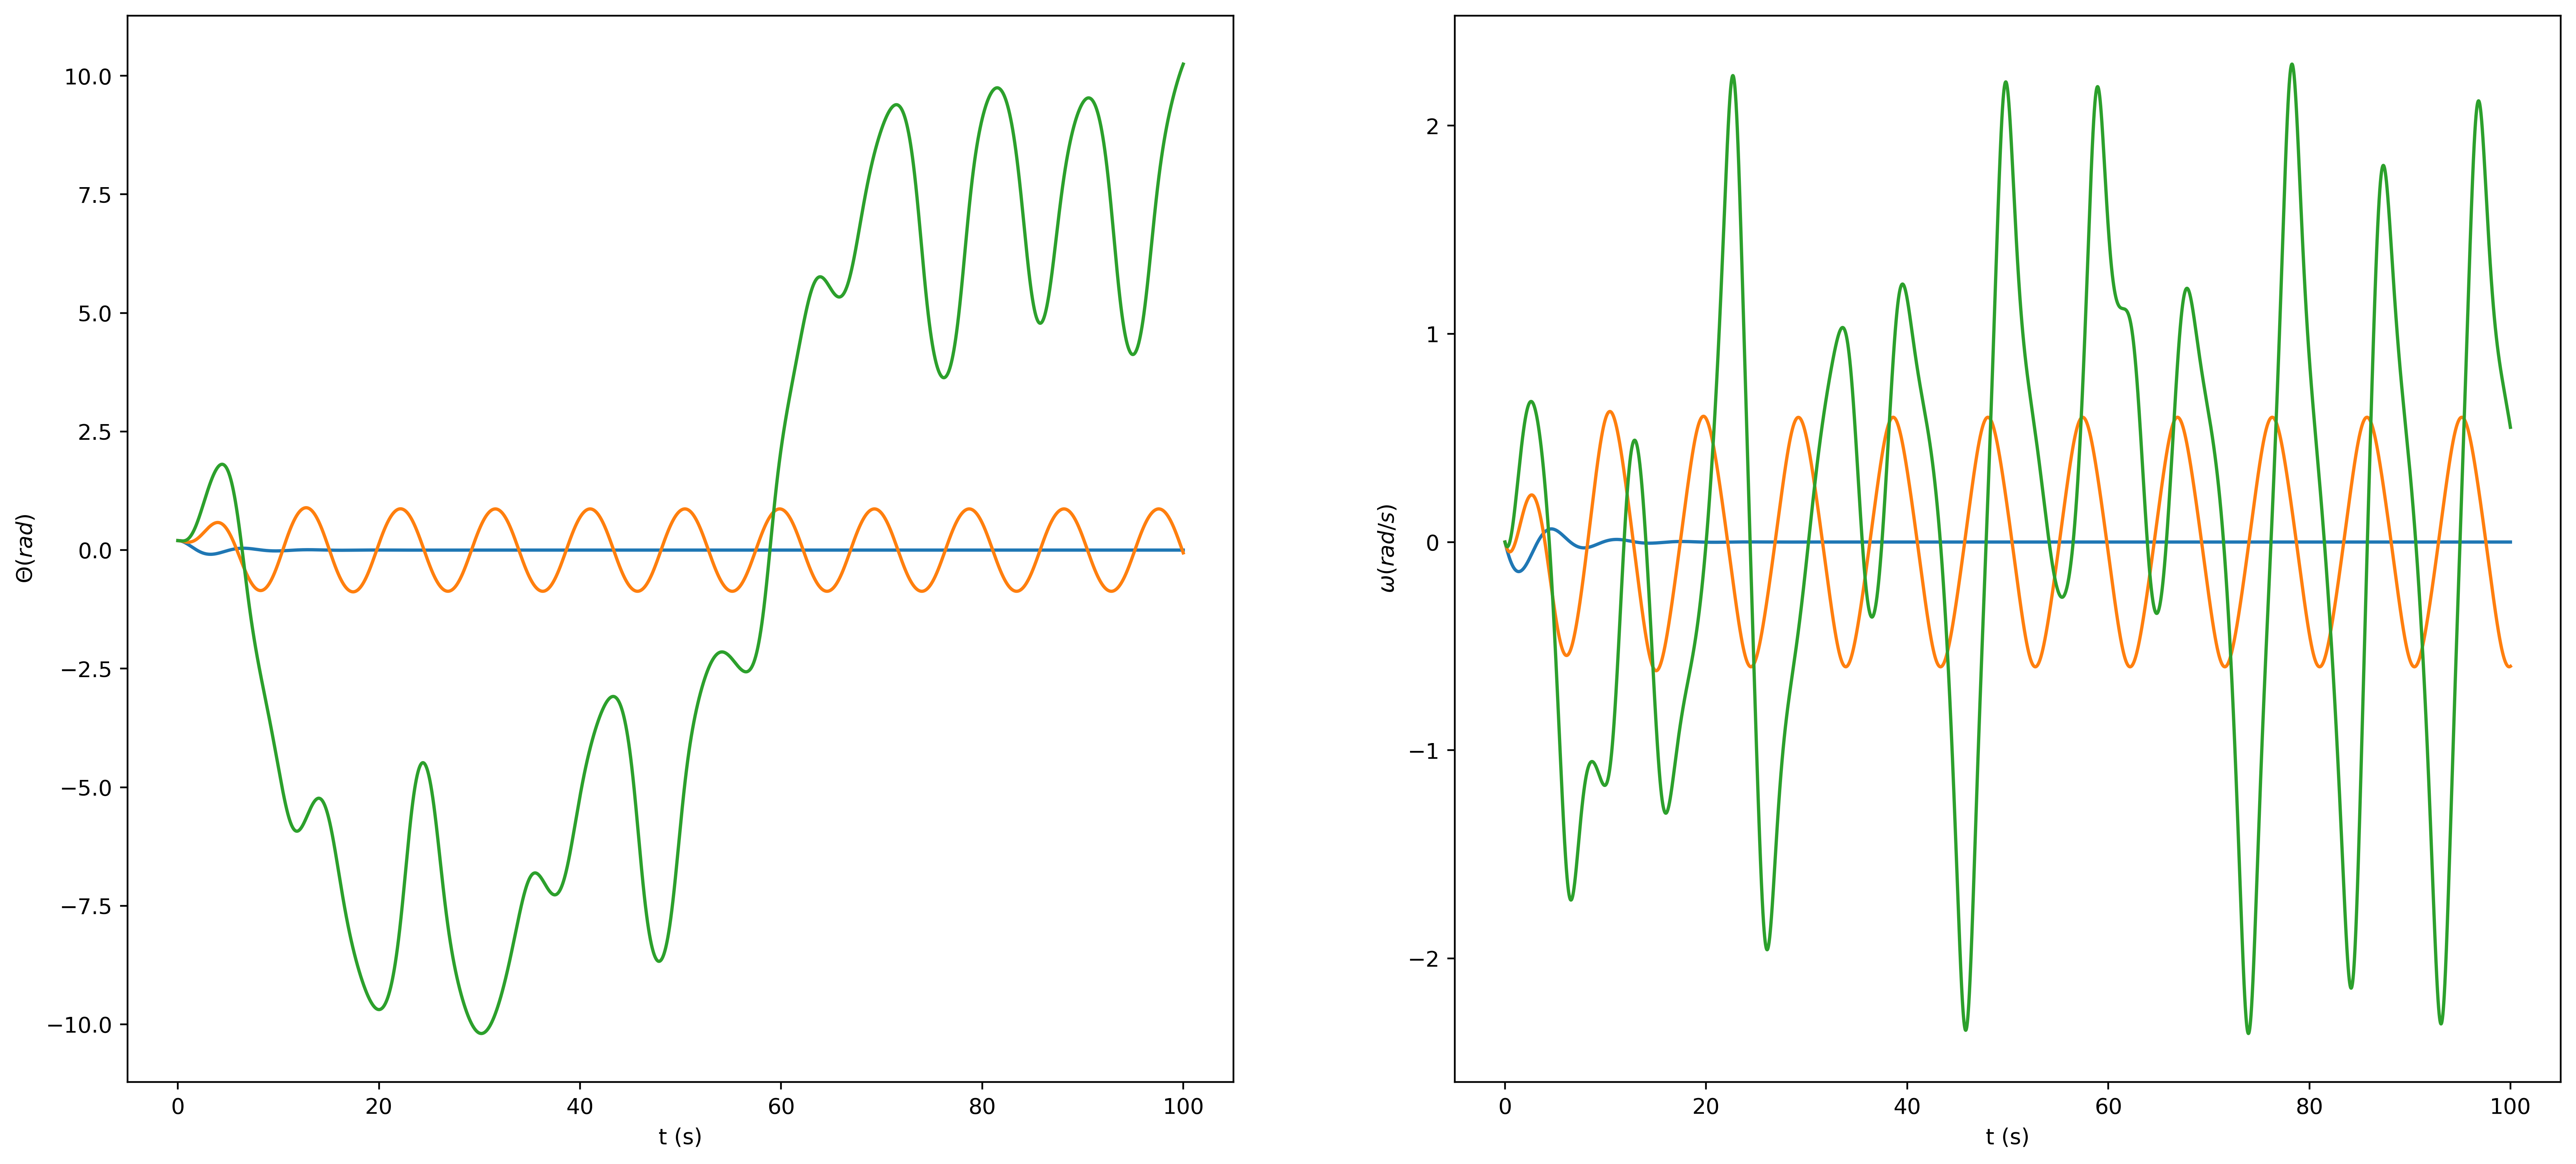

In [2]:
def EC(theta_w,t):
    theta,w = theta_w
    dtheta_dt = w 
    dw_dt = -sin(theta)-q*w+F_D*sin(omega_D*t)
    return dtheta_dt,dw_dt

tmax = 100
h = 0.01
q = 0.5
omega_D = 2/3
t = np.arange(0,tmax,h) # times for simulation 
theta0 = 0.2 # initial position 
w0 = 0

fig,ax = plt.subplots(1,2,figsize=(20,9),dpi=400)

for F_D in [0,0.5,1.2]:
    theta_w_odeint = odeint(EC,(theta0,w0),t) # integrate using odeint
    
    ax[0].plot(t,theta_w_odeint[:,0]) # plot first column of solution which is theta(t) 
    ax[0].set_xlabel('t (s)')
    ax[0].set_ylabel('$\Theta (rad)$')
    ax[1].plot(t,theta_w_odeint[:,1]) # plot second column of solution which is w(t) 
    ax[1].set_xlabel('t (s)')
    ax[1].set_ylabel('$\omega (rad/s)$')

#plt.subplots_adjust(hspace=0)
plt.show()

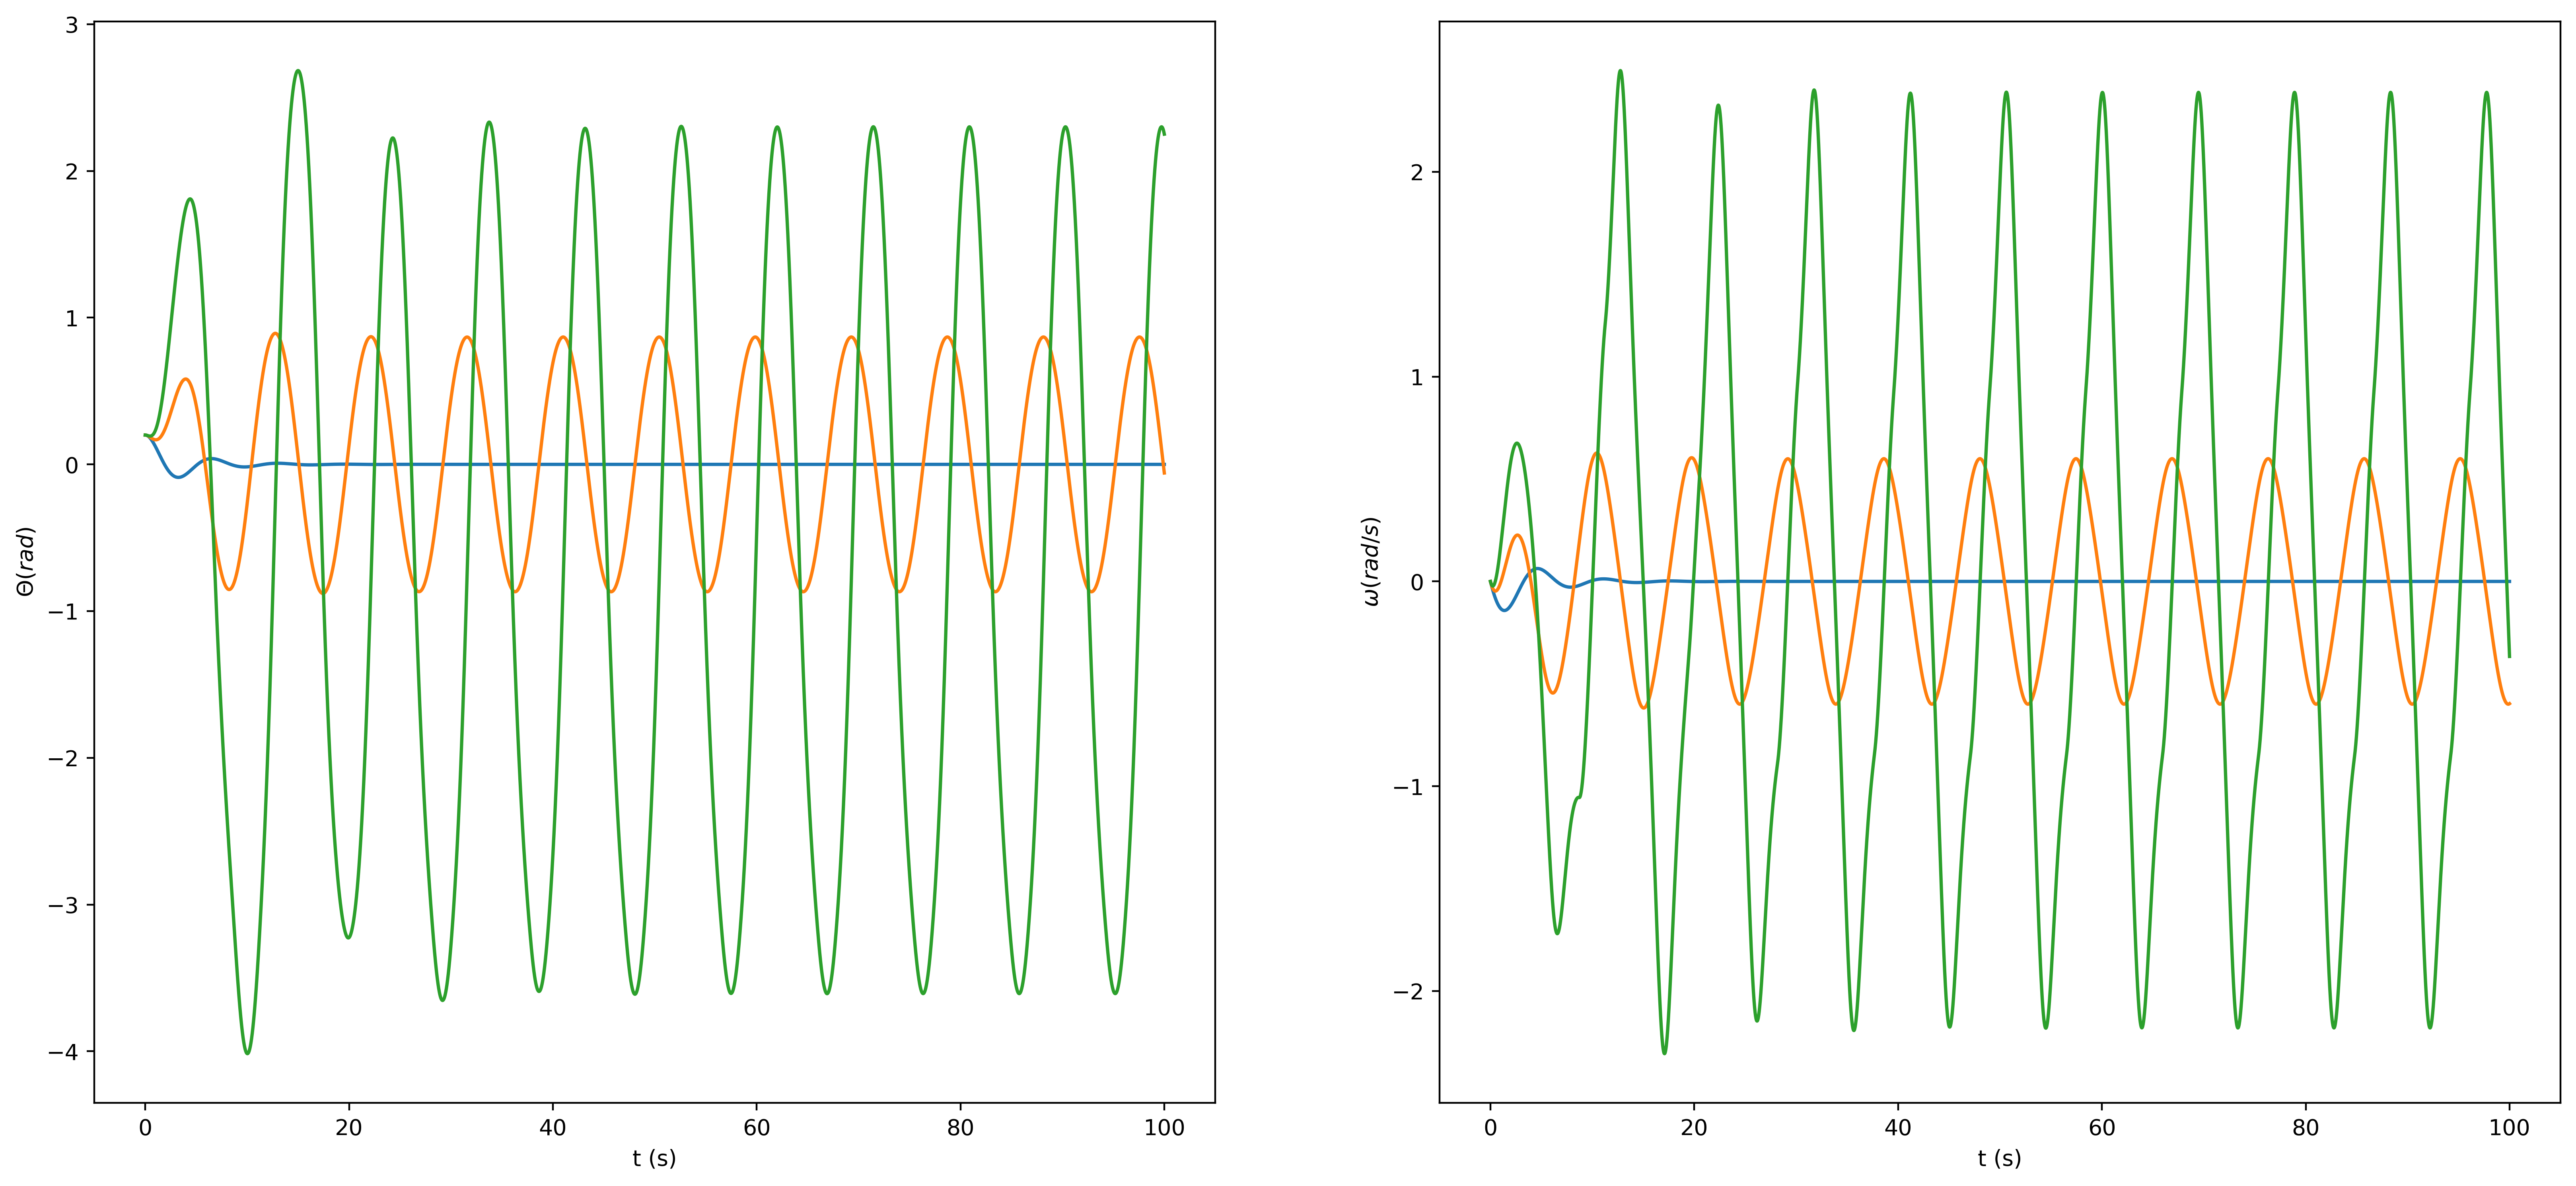

In [3]:
def EC_pi(theta_w,t):
    theta,w = theta_w
    dtheta_dt = w 
    if theta > pi:
        dw_dt = -sin(theta-pi)-q*w+F_D*sin(omega_D*t)
    elif theta < -pi:
        dw_dt = -sin(theta+pi)-q*w+F_D*sin(omega_D*t)
    else:
        dw_dt = -sin(theta)-q*w+F_D*sin(omega_D*t)
    return dtheta_dt,dw_dt

tmax = 100
h = 0.01
q = 0.5
omega_D = 2/3
t = np.arange(0,tmax,h) # times for simulation 
theta0 = 0.2 # initial position 
w0 = 0

fig,ax = plt.subplots(1,2,figsize=(20,9),dpi=400)

for F_D in [0,0.5,1.2]:
    theta_w_odeint = odeint(EC_pi,(theta0,w0),t) # integrate using odeint
    
    ax[0].plot(t,theta_w_odeint[:,0]) # plot first column of solution which is theta(t) 
    ax[0].set_xlabel('t (s)')
    ax[0].set_ylabel('$\Theta (rad)$')
    ax[1].plot(t,theta_w_odeint[:,1]) # plot second column of solution which is w(t) 
    ax[1].set_xlabel('t (s)')
    ax[1].set_ylabel('$\omega (rad/s)$')

#plt.subplots_adjust(hspace=0)
plt.show()

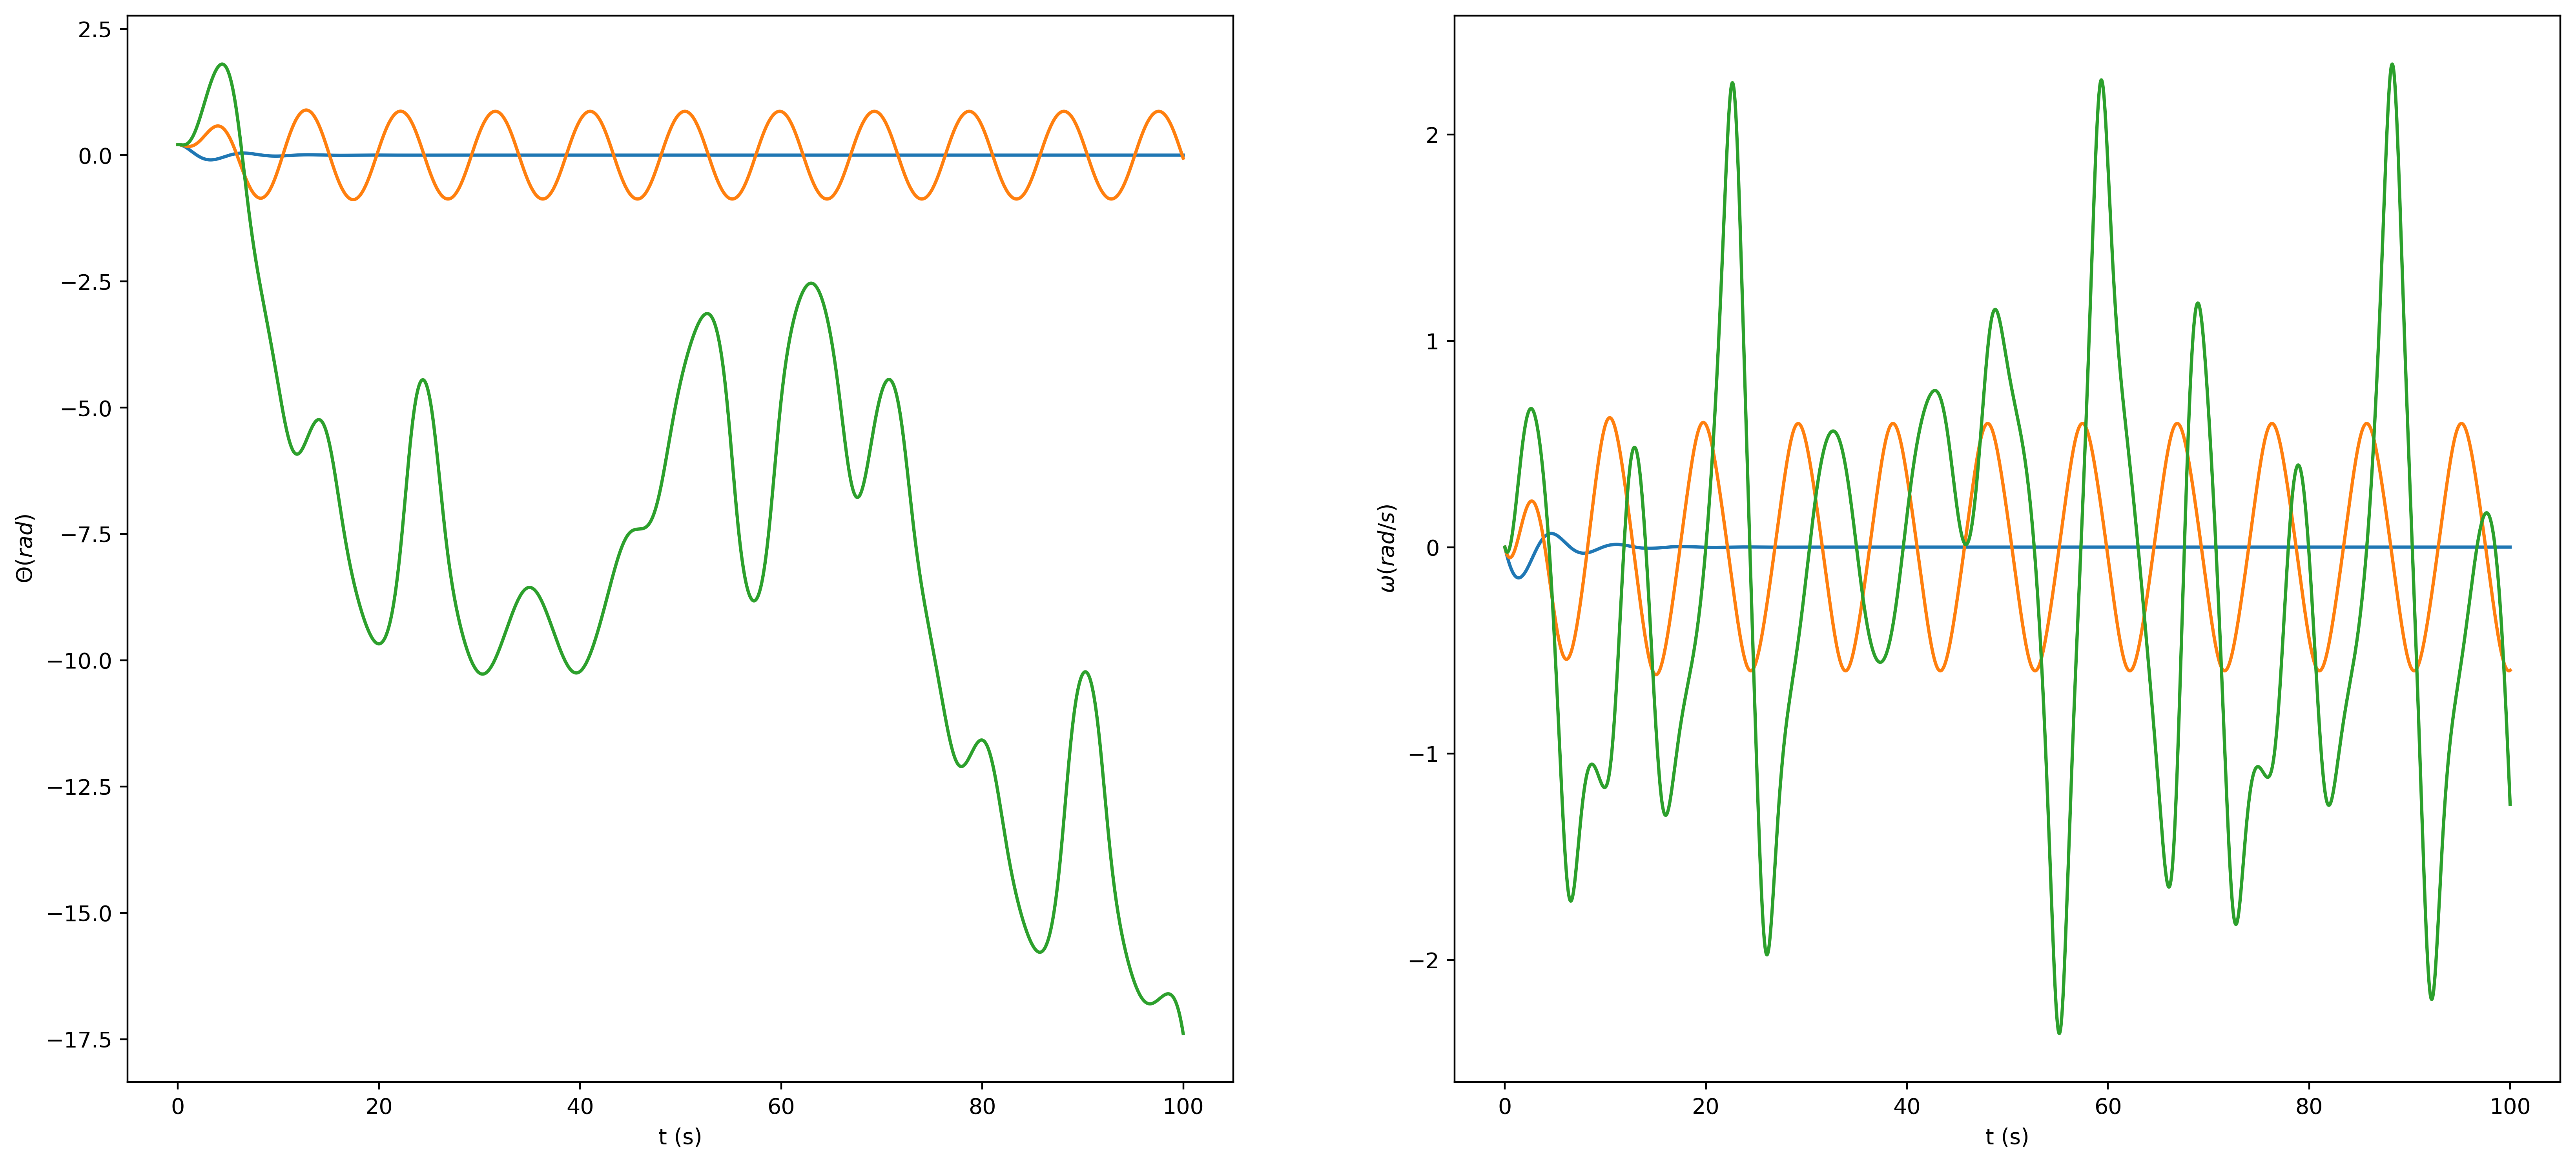

In [4]:
tmax = 100
h = 0.01
q = 0.5
omega_D = 2/3
t = np.arange(0,tmax,h) # times for simulation 
theta0_2 = 0.21 # initial position 
w0 = 0

fig,ax = plt.subplots(1,2,figsize=(20,9),dpi=400)

for F_D in [0,0.5,1.2]:
    theta_w_odeint_2 = odeint(EC,(theta0_2,w0),t) # integrate using odeint
    
    ax[0].plot(t,theta_w_odeint_2[:,0]) # plot first column of solution which is theta(t) 
    ax[0].set_xlabel('t (s)')
    ax[0].set_ylabel('$\Theta (rad)$')
    ax[1].plot(t,theta_w_odeint_2[:,1]) # plot second column of solution which is w(t) 
    ax[1].set_xlabel('t (s)')
    ax[1].set_ylabel('$\omega (rad/s)$')

#plt.subplots_adjust(hspace=0)
plt.show()

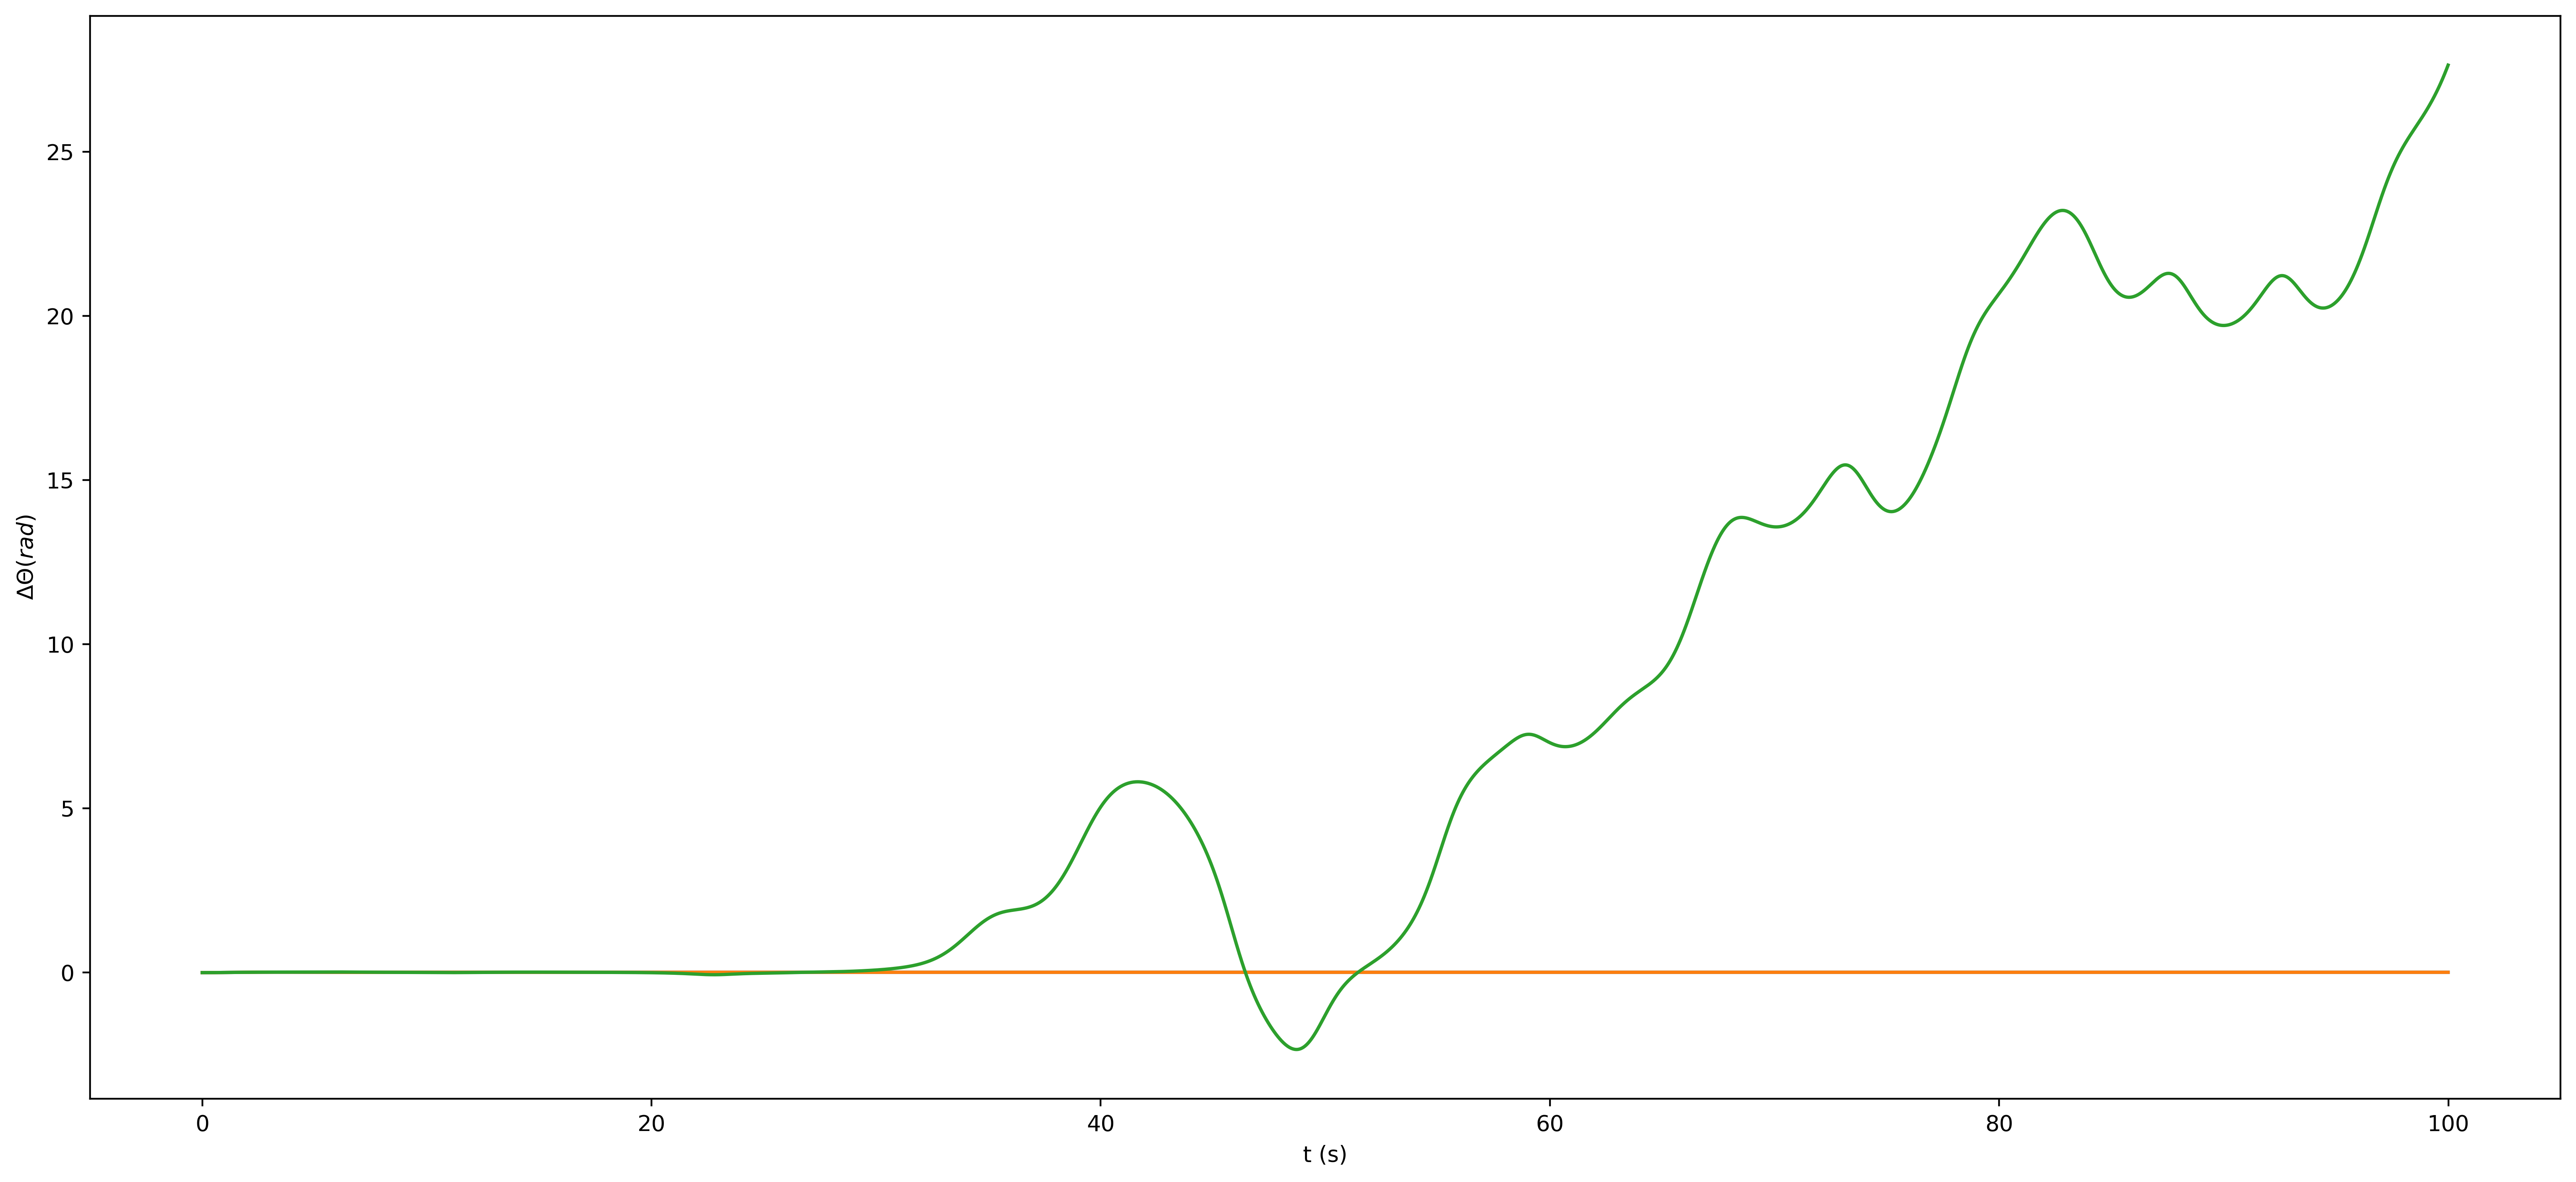

In [5]:
fig,ax = plt.subplots(figsize=(20,9),dpi=400)

for F_D in [0,0.5,1.2]:
    theta_w_odeint = odeint(EC,(theta0,w0),t) # integrate using odeint
    theta_w_odeint_2 = odeint(EC,(theta0_2,w0),t)
    
    ax.plot(t,theta_w_odeint[:,0]-theta_w_odeint_2[:,0]) # plot first column of solution which is theta(t) 
    ax.set_xlabel('t (s)')
    ax.set_ylabel('$\Delta\Theta (rad)$')

#plt.subplots_adjust(hspace=0)
plt.show()

### 2. The low-pass filter

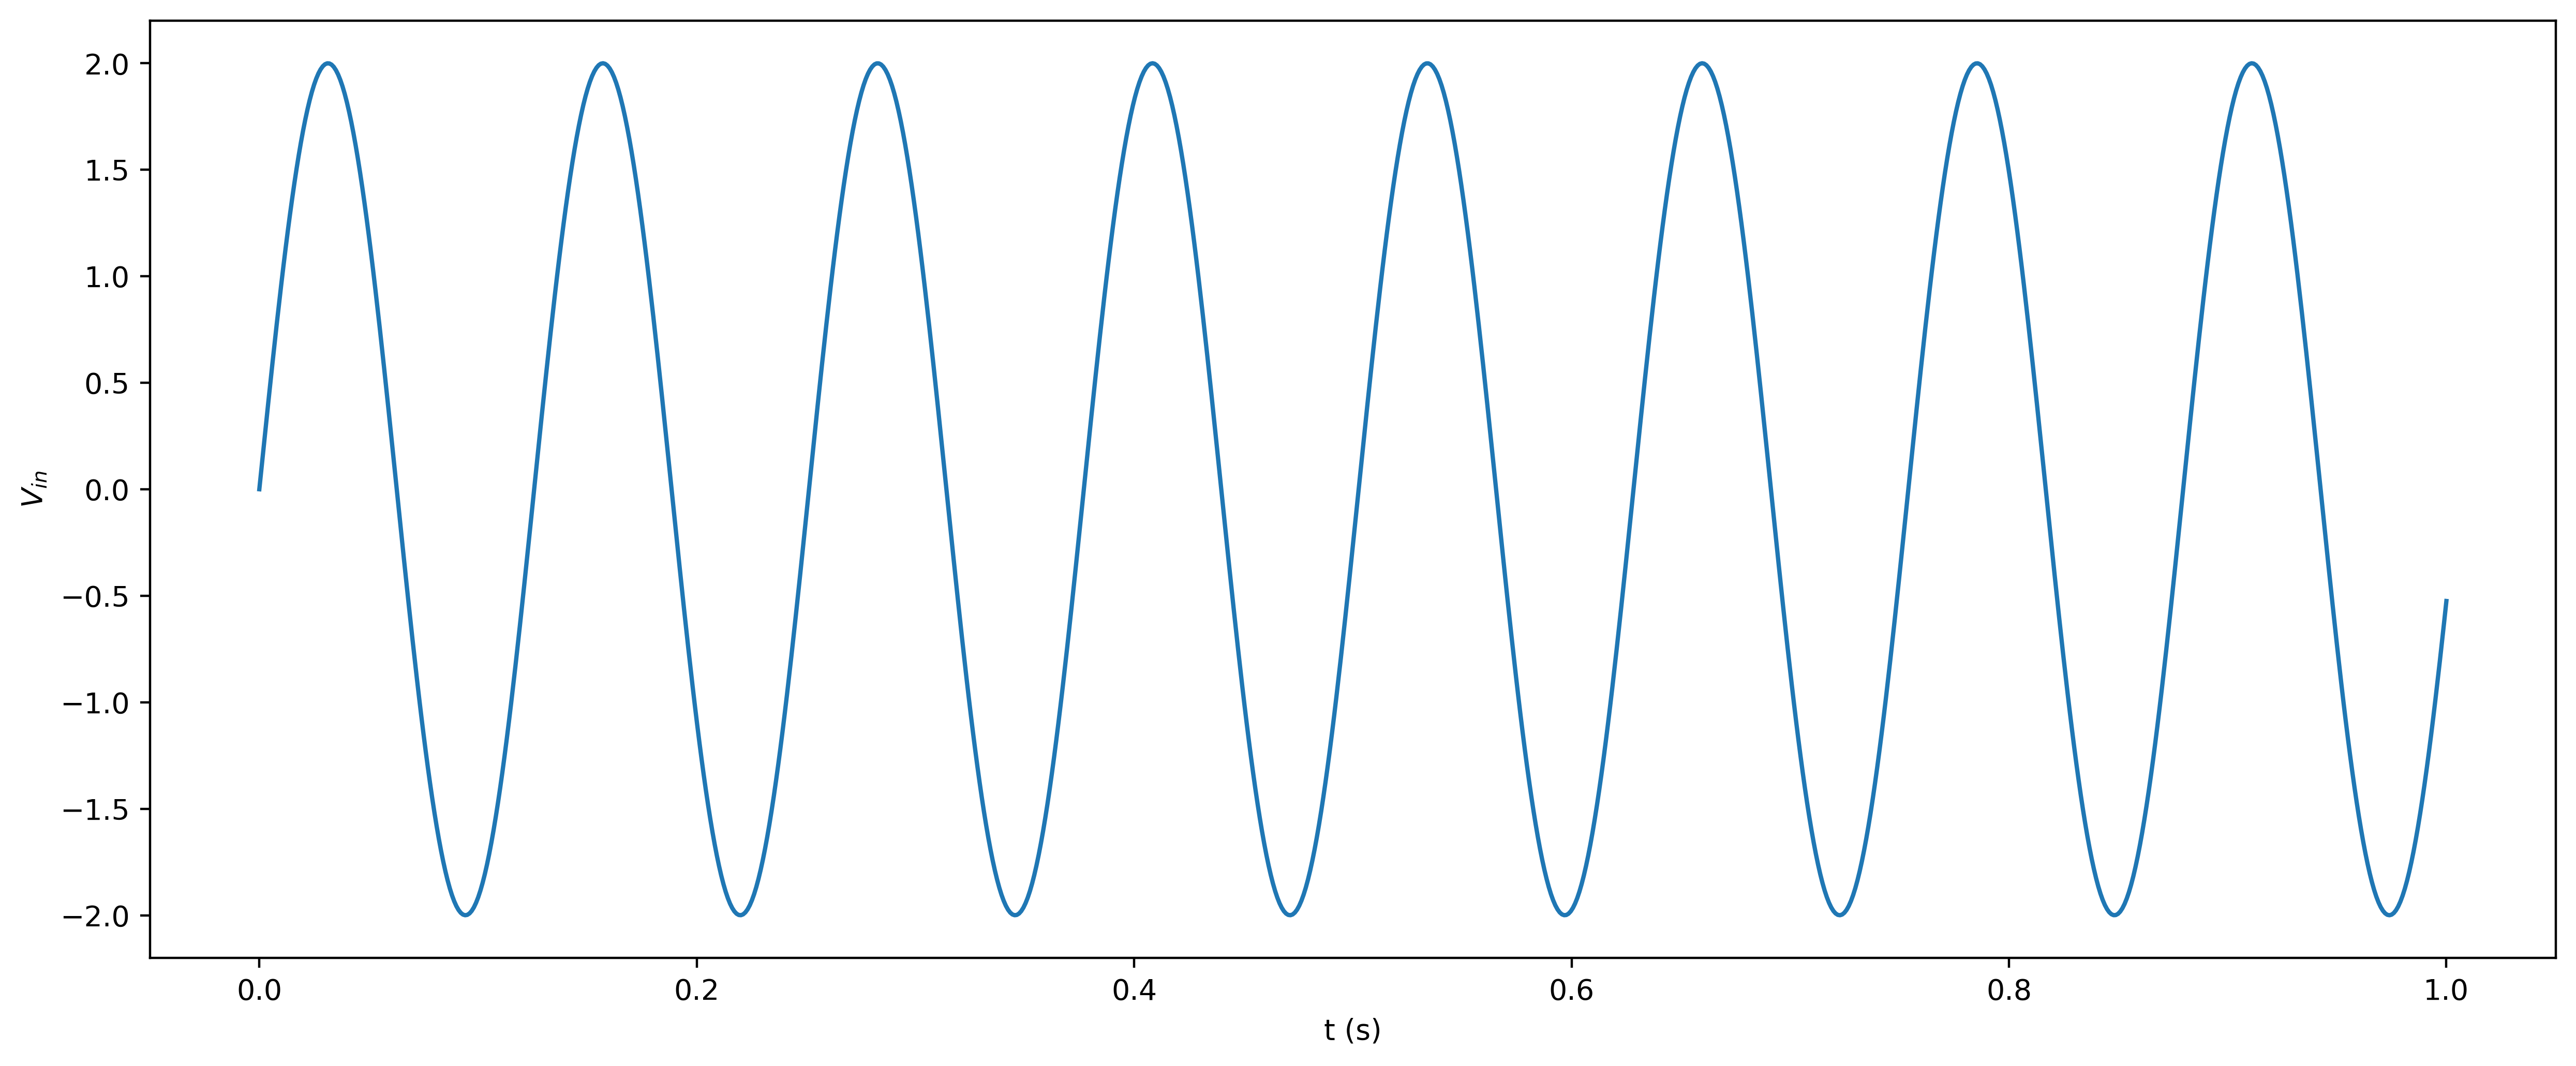

In [6]:
def fV_in(t,A,w):
    return A*sin(w*t)

A = 2
w = 50
t = np.linspace(0,1,1000)

V_in = fV_in(t,A,w)

fig,ax = plt.subplots(figsize=(15,6),dpi=400)

ax.plot(t,V_in)
ax.set_xlabel('t (s)')
ax.set_ylabel('$V_{in}$')

plt.show()

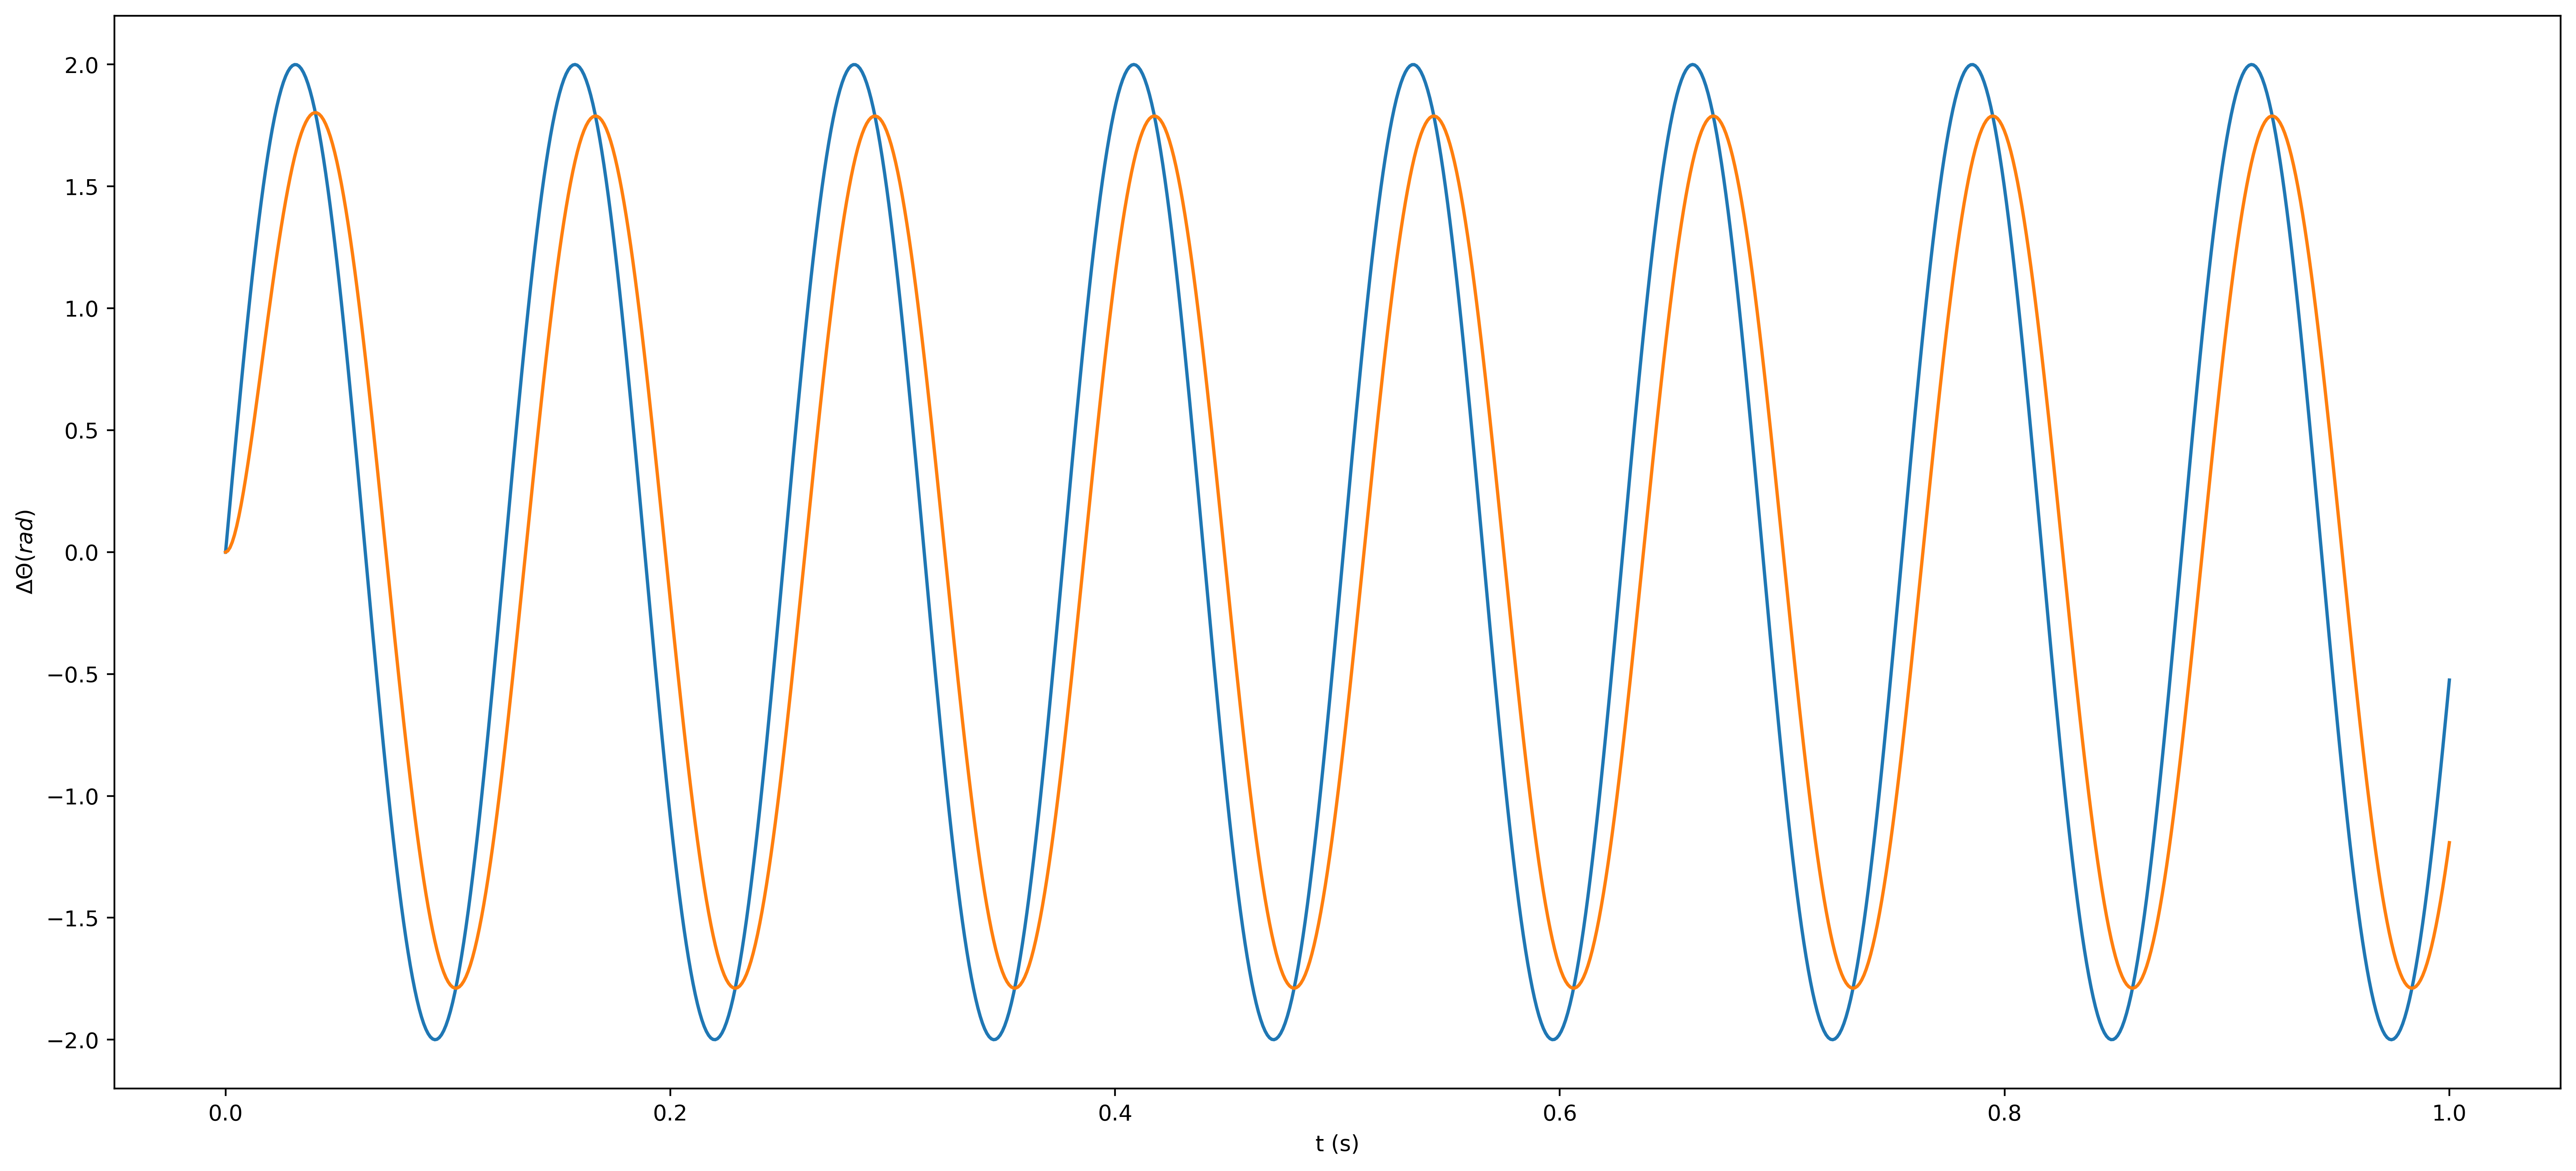

In [10]:
def lowpass(V_out,t):
    return (A*sin(w*t)-V_out)/0.01

V_out0 = 0
A = 2
w = 50
t = np.linspace(0,1,1000)

V_out = odeint(lowpass,V_out0,t)

fig,ax = plt.subplots(figsize=(20,9),dpi=400)

ax.plot(t,V_in)
ax.plot(t,V_out)
ax.set_xlabel('t (s)')
ax.set_ylabel('$\Delta\Theta (rad)$')

#plt.subplots_adjust(hspace=0)
plt.show()

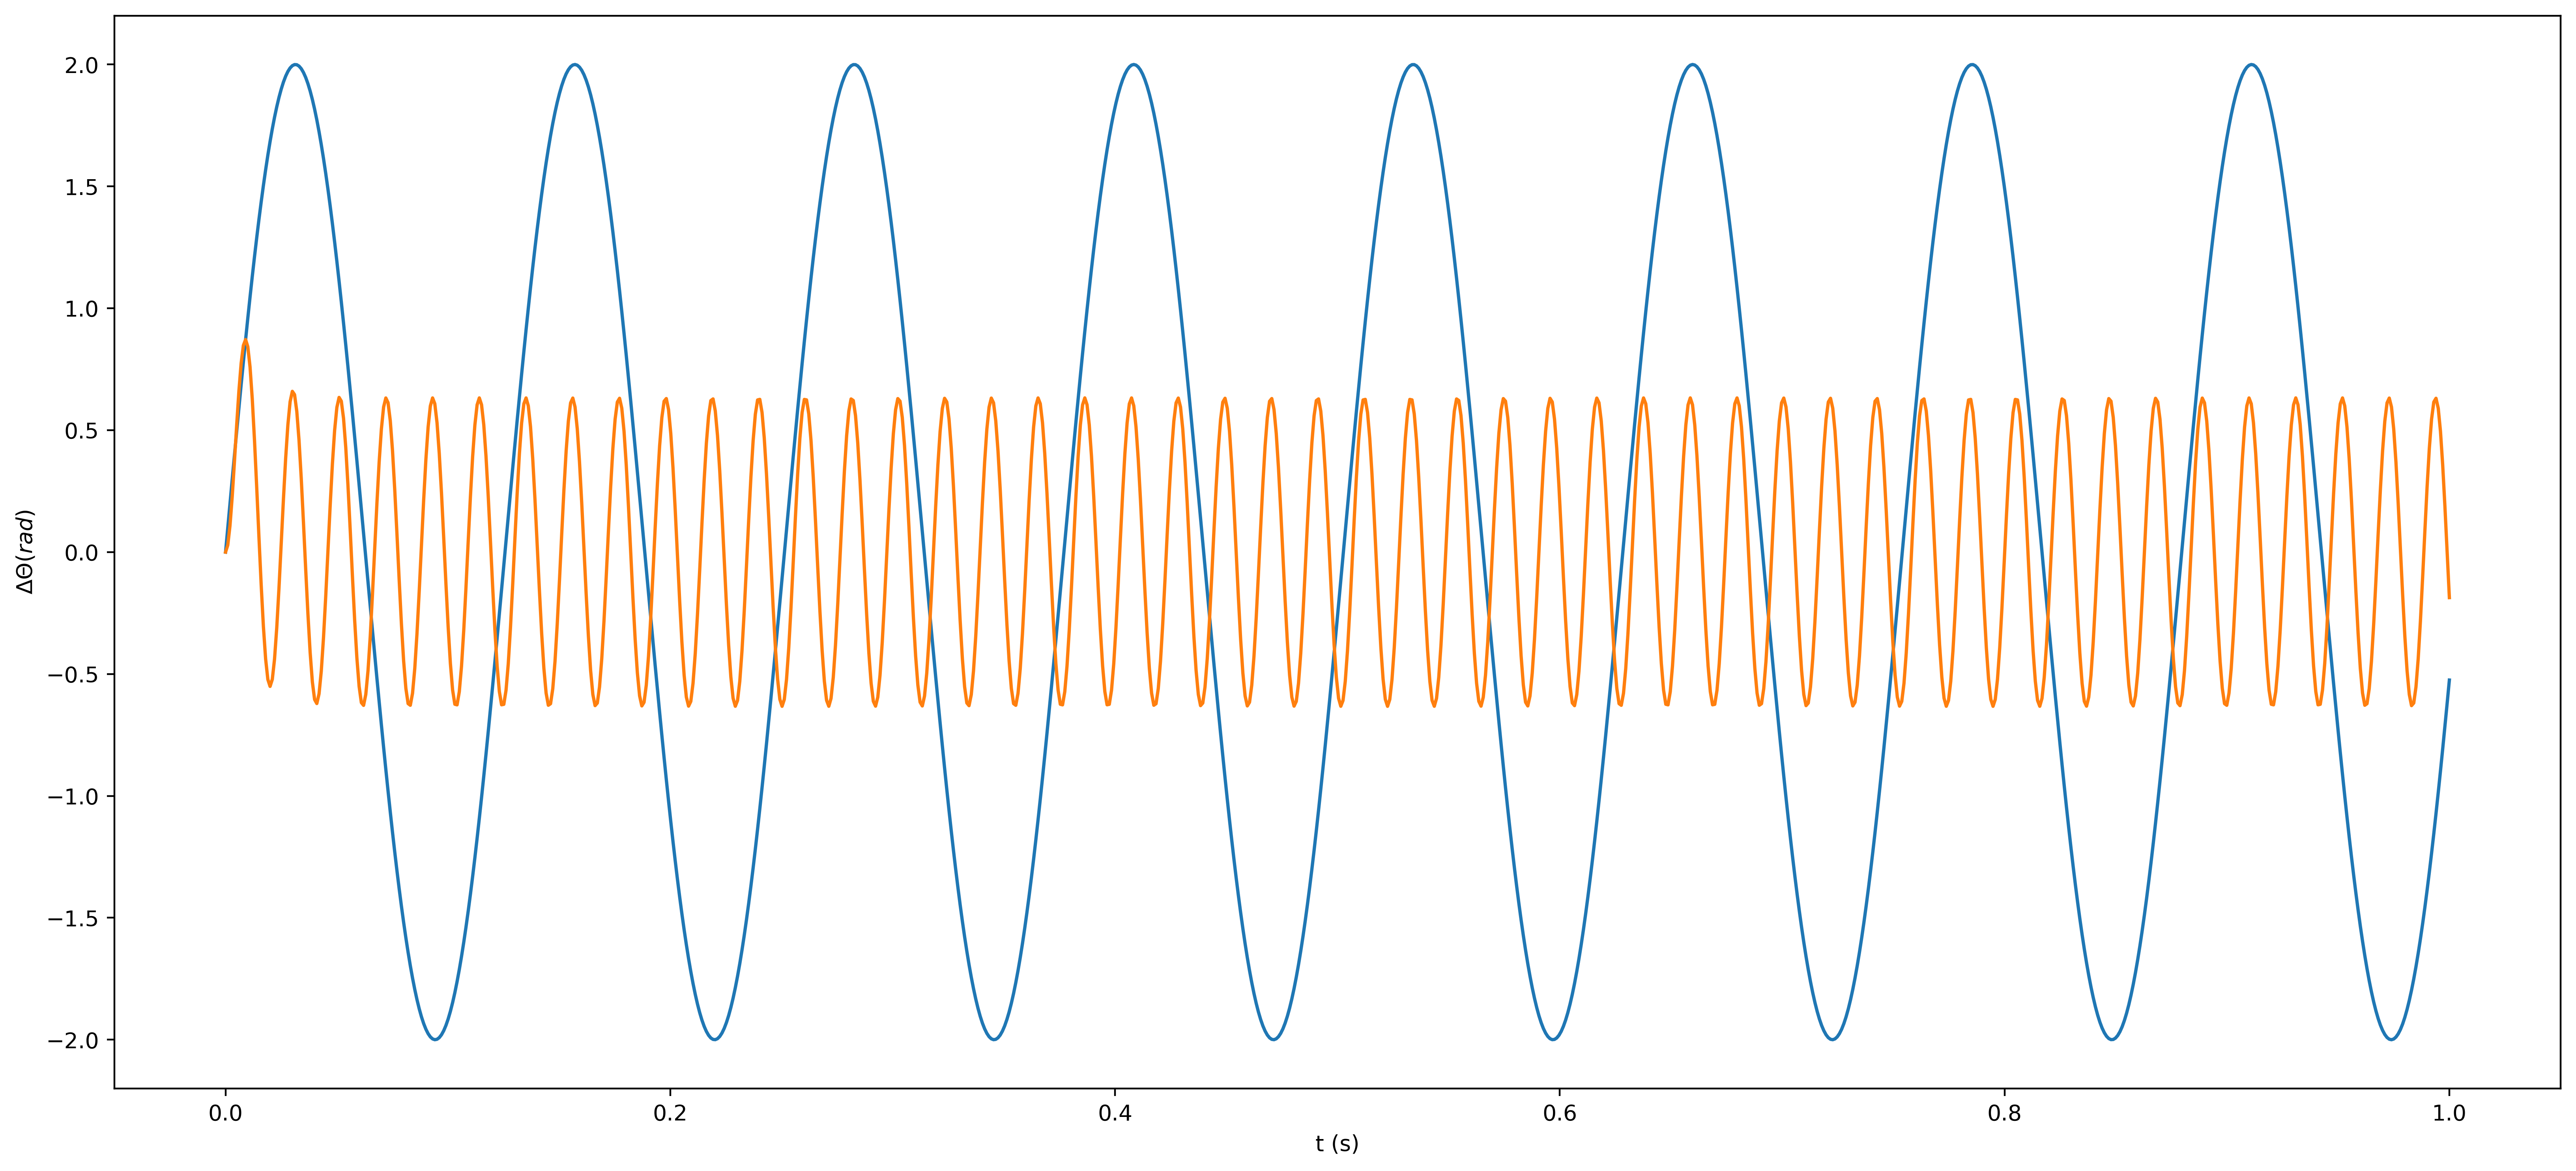

In [12]:
w = 300
V_out = odeint(lowpass,V_out0,t)

fig,ax = plt.subplots(figsize=(20,9),dpi=400)

ax.plot(t,V_in)
ax.plot(t,V_out)
ax.set_xlabel('t (s)')
ax.set_ylabel('$\Delta\Theta (rad)$')

#plt.subplots_adjust(hspace=0)
plt.show()

### 3. Projectile motion

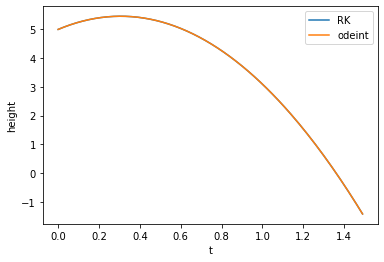

In [24]:
def F_ode(yvec,t):
    y,vy = yvec # unpack vector into the two dependent variables 
    dydt = vy
    Fy = -m*g
    dvydt = Fy/m
    return dydt,dvydt

def RK(y,vy,t):
    dydt = vy
    Fy = -m*g
    dvydt = Fy/m
    return dydt,dvydt # return derivatives as tuple


#RK
m = 0.3
g = 9.81
h = 0.01
tmax = 1.5
t = np.arange(0,tmax,h) 
y = np.zeros([int(tmax/h)])
vy = np.zeros([int(tmax/h)])
y0 = 5
vy0 = 3
y[0] = y0
vy[0] = vy0

for j in range(1, int(tmax/h)): 
    time = h*(j-1)
    dydt, dvydt = RK(y0, vy0, time) # calculate derivative function at initial step # evaluate x, y and t at midpoint using Euler starting from initial step 
    ymid = y0 + (h/2) * dydt
    vymid = vy0 + (h/2) * dvydt
    tmid = time + (h/2)
    dydt, dvydt = RK(ymid, vymid, tmid) # calculate derivative function at midpoint valu # Calculate x and y values at neF time
    y[j] = y0 + h * dydt
    vy[j] = vy0 + h * dvydt
    y0, vy0 = y[j], vy[j]
    
#odeint
y0 = 5
vy0 = 3
vvy = odeint(F_ode,(y0,vy0),t)

plt.plot(t,y,label='RK')
plt.plot(t,vvy[:,0],label='odeint') # plot first column of solution which is x(t) 
plt.xlabel('t')
plt.ylabel('height')
plt.legend()
plt.show()

### 4. Trajectory with air resistance

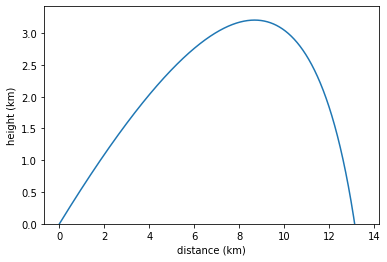

In [74]:
def f(vec,t):
    k = -pi*R**2*rho*C/(2*m)
    x,y,vx,vy = vec
    dxdt = vx
    dvxdt = k*vx
    dydt = vy
    dvydt =  k*vx
    return dxdt,dydt,dvxdt,dvydt

R = 0.08 #m
m = 1 #kg
rho = 1.22 #kgm^-3
C = 0.47
vi = 100 #m/s
theta = pi/6

t = np.arange(0,400,0.01)
x0 = 0
y0 = 0
vx0 = vi*cos(theta)
vy0 = vi*sin(theta)

xy = odeint(f,(x0,y0,vx0,vy0),t)

plt.plot(xy[:,0]/1000,xy[:,1]/1000) # plot first column of solution which is x(t) 
plt.xlabel('distance (km)')
plt.ylabel('height (km)')
plt.ylim(0,)

plt.show()

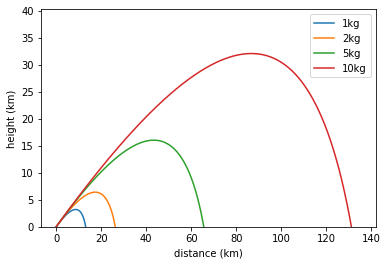

In [75]:
t = np.arange(0,4000,0.01)
m = [1,2,5,10]

for i in m:
    m = i
    xy = odeint(f,(x0,y0,vx0,vy0),t)
    plt.plot(xy[:,0]/1000,xy[:,1]/1000,label=f'{i}kg') # plot first column of solution which is x(t) 
plt.xlabel('distance (km)')
plt.ylabel('height (km)')
plt.ylim(0,)
plt.legend()
plt.show()